# Predict Credit Card Consumption

**Understanding the consumption pattern for credit cards at an individual consumer level is important for customer relationship management. This understanding allows banks to customize for consumers and make strategic marketing plans. Thus it is imperative to study the relationship between the characteristics of the consumers and their consumption patterns.   XYZ Bank has given a sample of their customers, along with their details like age, gender and other demographics. Also shared are information on liabilities, assets and history of transactions with the bank for each customer.   In addition to the above, data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September). Predict the average spend for a different set of customers in the test set for the coming 3 months.**

## Objective :


#### Predict the average spend for a different set of customers in the test set for the coming 3 months

* ##### data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September).



## Evaluation Criteria
The average predicted spend of customers for the next three months would be evaluated using 100*RMSLE where RMSLE is Root of Mean Squared Logarithmic Error  

## Data
#### train_HFhgVok.zip
train.zip contains train.csv and data_dictionary.csv.

* train.csv contains the training data with details of customers, along with their average credit card spend for the next three months
* Data_Dictionary.xlsx contains a brief description of each variable provided in the training and test set.
 

#### test_pqNh56L.csv
test.csv contains details of the customers for which the participants need to predict the average spend for the next three months



## Variable	Definition
* id	Unique ID for the Customer
* cc_cons	(Target) Average Credit Card Spend in next three months
 


 

In [1]:
# Import all required modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile 

In [2]:

with zipfile.ZipFile('train_bFQbE3f.zip','r') as zip_ref:
  a=zip_ref.extractall('Data')
  print(zip_ref.namelist())

['Data_Dictionary.xlsx', '__MACOSX/', '__MACOSX/._Data_Dictionary.xlsx', 'train.csv', '__MACOSX/._train.csv']


In [3]:

file=pd.read_csv('Data/train.csv')
file.head(10)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814
5,4340,current,M,26,233,53819.88,1371.00,4712.92,2220.0,1048.00,...,22.0,20603.0,31189.26,33183.13,7.0,31.0,20890.0,NaN,0.00,626
6,28060,current,F,30,683,1495.00,4237.00,2212.00,5292.0,1964.00,...,24.0,24782.0,27984.33,81517.00,3.0,31.0,50000.0,NaN,0.00,2052
7,746,current,M,32,892,1847.00,5976.00,1347.80,4112.0,669.00,...,19.0,30281.0,39320.36,34332.00,3.0,23.0,31663.0,NaN,0.00,434
8,41628,current,M,37,233,9214.92,NaN,95625.88,16423.0,11419.76,...,28.0,51555.0,285663.35,254939.15,25.0,34.0,92800.0,NaN,0.00,10331
9,16836,saving,M,47,233,9191.31,NaN,8327.55,NaN,14642.00,...,NaN,NaN,NaN,503.00,1.0,0.0,275.0,NaN,0.00,2437


In [4]:
#file.isnull().sum()

In [5]:
file2=file.loc[:,['id','cc_cons_apr','cc_cons_may','cc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun',
                 'card_lim','credit_count_apr','credit_count_may','credit_count_jun',
                  'credit_amount_apr','credit_amount_may','credit_amount_jun',
                 'max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun','cc_cons']]

In [6]:
file2.head()

,id,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,card_lim,credit_count_apr,credit_count_may,credit_count_jun,credit_amount_apr,credit_amount_may,credit_amount_jun,max_credit_amount_apr,max_credit_amount_may,max_credit_amount_jun,cc_cons
0,23334,7695.00,479.00,622.0,2.0,1.0,3.0,150000.0,1.0,3.0,7.0,50259.0,114252.0,1279.37,50000.0,45000.0,470.0,435
1,20329,52702.00,29873.00,1087.0,11.0,14.0,11.0,176000.0,9.0,6.0,8.0,169812.0,174606.0,55390.00,70000.0,150000.0,27000.0,1921
2,17679,10800.49,21659.64,1168.0,6.0,9.0,6.0,65000.0,4.0,2.0,6.0,38942.0,23051.0,29297.91,11700.0,13800.0,20800.0,1970
3,16428,20936.00,2094.00,11778.5,9.0,6.0,6.0,600000.0,1.0,1.0,3.0,2294.0,19529.0,7544.00,2000.0,19300.0,5300.0,21579
4,18721,1183.83,3656.29,945.0,2.0,7.0,9.0,100000.0,1.0,2.0,4.0,10271.0,3194.0,53483.00,10000.0,3000.0,45000.0,1814


In [7]:
file3=file2.loc[:,['id','cc_cons_apr','cc_cons_may','cc_cons_jun','cc_cons']]

In [8]:
file3.isnull().sum()

id             0
cc_cons_apr    0
cc_cons_may    0
cc_cons_jun    0
cc_cons        0
dtype: int64

In [9]:
file_info=pd.read_excel('Data/Data_Dictionary.xlsx')
file_info

,Variable,Description
0,id,Unique ID for every Customer
1,account_type,Account Type – current or saving
2,gender,Gender of customer
3,age,Age of customer
4,region_code,Code assigned to region of residence (has order)
5,cc_cons_apr,Credit card spend in April
6,dc_cons_apr,Debit card spend in April
7,cc_cons_may,Credit card spend in May
8,dc_cons_may,Debit card spend in May
9,cc_cons_jun,Credit card spend in June


In [10]:
file.shape

(32820, 44)

M    28106
F     4714
Name: gender, dtype: int64


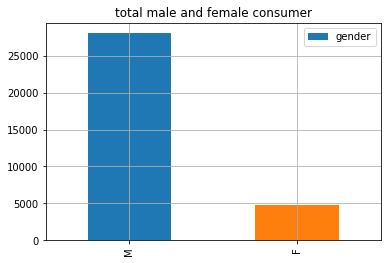

In [11]:
# To check gender counts.
Ge_count=file.iloc[:,2].value_counts()
print(Ge_count)
barlist=Ge_count.plot(kind='bar')
#barlist.set_color('r')
plt.title('total male and female consumer')
plt.legend()
plt.grid()
plt.show()

FRom above bar Graph, it is obeserved :
* female customer's account is too low as compared to Male customer.

#### Mean, Variance and Std-dev

In [12]:
# Mean, Variance and Std-dev with simple command
print(file.info())# information about data
print(file.describe())# df12.describe() is used to calculate count,mean,varience,
# standard deviations,mimimum ,maximum vaue and 25,50,75 percentile.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
id                       32820 non-null int64
account_type             32820 non-null object
gender                   32820 non-null object
age                      32820 non-null int64
region_code              32820 non-null int64
cc_cons_apr              32820 non-null float64
dc_cons_apr              13768 non-null float64
cc_cons_may              32820 non-null float64
dc_cons_may              15481 non-null float64
cc_cons_jun              32820 non-null float64
dc_cons_jun              11523 non-null float64
cc_count_apr             30421 non-null float64
cc_count_may             31667 non-null float64
cc_count_jun             31230 non-null float64
dc_count_apr             13768 non-null float64
dc_count_may             15481 non-null float64
dc_count_jun             17323 non-null float64
card_lim                 32811 non-null float64
personal_loan_active     2742 non-n

In [13]:
# Arraging 

In [14]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(file3, test_size = 0.25)

x_train = train.drop(['id','cc_cons'], axis=1)
y_train = train['cc_cons']

x_test = test.drop(['id','cc_cons'], axis = 1)
y_test = test['cc_cons']
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (24615, 3)
x_test (8205, 3)
y_train (24615,)
y_test (8205,)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [16]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_log_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.709615160916041
RMSE value for k=  2 is: 1.6004235465302354
RMSE value for k=  3 is: 1.5801556237155532
RMSE value for k=  4 is: 1.5729682879930265
RMSE value for k=  5 is: 1.57112383420471
RMSE value for k=  6 is: 1.566965775933123
RMSE value for k=  7 is: 1.5667975507065377
RMSE value for k=  8 is: 1.564990419742952
RMSE value for k=  9 is: 1.5669087180725707
RMSE value for k=  10 is: 1.567255353198012
RMSE value for k=  11 is: 1.5631308431696165
RMSE value for k=  12 is: 1.562699864162015
RMSE value for k=  13 is: 1.560690307535232
RMSE value for k=  14 is: 1.5593398485856536
RMSE value for k=  15 is: 1.5588890438398046
RMSE value for k=  16 is: 1.5602455752885225
RMSE value for k=  17 is: 1.559941138348123
RMSE value for k=  18 is: 1.5598008839506627
RMSE value for k=  19 is: 1.5604885987605461
RMSE value for k=  20 is: 1.5602951473946778


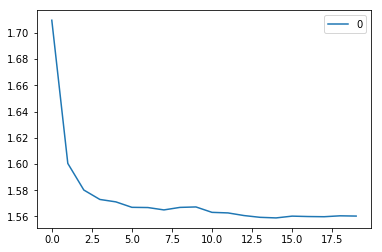

In [18]:
#plotting the rmse values against k values
%matplotlib inline
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [19]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,11,13,15,17,19,21]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
optimal_k=model.best_params_
print("best optimal_k", optimal_k)

best optimal_k {'n_neighbors': 21}


In [20]:
k=list(optimal_k.values())
k[0]

21

In [21]:
#reading test and submission files
test11 = pd.read_csv('test.csv')
test11=test11.loc[:,['id','cc_cons_apr','cc_cons_may','cc_cons_jun','cc_cons']]
print(test11.isnull().sum())
mean = test11['cc_cons_may'].mean() #imputing cc_cons_may with mean
test11['cc_cons'].fillna(0, inplace =True)
test11['cc_cons_may'].fillna(mean, inplace =True)
mean1 = test11['cc_cons_jun'].mean() #imputing cc_cons_may with mean
test['cc_cons_jun'].fillna(mean1, inplace =True)
print(type(test11))
print(test11.isnull().sum())

id                0
cc_cons_apr       0
cc_cons_may       1
cc_cons_jun       1
cc_cons        6538
dtype: int64
<class 'pandas.core.frame.DataFrame'>
id             0
cc_cons_apr    0
cc_cons_may    0
cc_cons_jun    1
cc_cons        0
dtype: int64


/opt/app-root/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/opt/app-root/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
submission = pd.read_csv('SampleSubmission.csv')
print(submission.shape)
print(test11.shape)
#submission=submission[0:len(test)]
submission['id']= test11['id']
submission['cc_cons'] = test11['cc_cons']
print(submission.shape)

(14067, 2)
(6538, 5)
(14067, 2)


In [23]:
test11.head()

,id,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_cons
0,6975,17942.70,1656.00,4551.00,0.0
1,43223,44870.36,34177.00,25889.21,0.0
2,45502,1073.00,4141.00,6740.29,0.0
3,12368,33060.58,3797.12,291.00,0.0
4,40415,18236.90,30513.30,20395.28,0.0


In [24]:
test1 = test11.drop(['id','cc_cons'], axis = 1)

In [25]:
submission.head()

,id,cc_cons
0,6975.0,0.0
1,43223.0,0.0
2,45502.0,0.0
3,12368.0,0.0
4,40415.0,0.0


In [26]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(test1)
test1=imp.transform(test1)
test1.shape

(6538, 3)

In [27]:
x_train = file3.drop(['id','cc_cons'], axis=1)
x_train=x_train.replace(np.nan,0)
y_train = file3['cc_cons']
y_train=y_train.replace(np.nan,0)
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
print(x_train.shape,y_train.shape)

(32820, 3) (32820,)


In [28]:
#test
#preprocessing test dataset

test_scaled = scaler.fit_transform(test1)
test = pd.DataFrame(test_scaled)
print(test.shape)

(6538, 3)


In [29]:

model = neighbors.KNeighborsRegressor(n_neighbors = k[0])

model.fit(x_train, y_train)  #fit the model
pred=model.predict(test) #make prediction on test set
#error = sqrt(mean_squared_log_error(y_test,pred)) #calculate rmse
#rmse_val.append(error) #store rmse values
#print('RMSLE value for k= ' , k[0] , 'is:', error)

In [30]:
submission.head()

,id,cc_cons
0,6975.0,0.0
1,43223.0,0.0
2,45502.0,0.0
3,12368.0,0.0
4,40415.0,0.0


In [31]:
#test.head()

In [32]:

#predicting on the test set and creating submission file
#predict = model.predict(test)
from statistics import median 
submission['cc_cons'][0:len(test)] = pred
#submission['cc_cons'][len(test):len(submission)] =median(pred)
submission.to_csv('submit_file_KNN.csv',index=False)


In [33]:

print(median(pred))

6062.642857142857


In [34]:
print(np.mean(pred))

7994.691037014378


In [48]:
file3=file3.replace(np.nan,0)
print("training data size",file3.shape)

training data size (32820, 5)


In [50]:
test11['cc_cons']=pred
print("testing data size",test11.shape)

testing data size (6538, 5)


In [45]:
new_pred_file=pd.concat([file3,test11], ignore_index=True, sort =False)
new_pred_file

,id,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_cons
0,23334,7695.00,479.000000,622.000,435.000000
1,20329,52702.00,29873.000000,1087.000,1921.000000
2,17679,10800.49,21659.640000,1168.000,1970.000000
3,16428,20936.00,2094.000000,11778.500,21579.000000
4,18721,1183.83,3656.290000,945.000,1814.000000
5,4340,53819.88,4712.920000,1048.000,626.000000
6,28060,1495.00,2212.000000,1964.000,2052.000000
7,746,1847.00,1347.800000,669.000,434.000000
8,41628,9214.92,95625.880000,11419.760,10331.000000
9,16836,9191.31,8327.550000,14642.000,2437.000000


In [52]:
import pickle
pickle_out = open("train32820+pred6538.pickle","wb")
pickle.dump(new_pred_file, pickle_out)
pickle_out.close()